<center><h1>Housing Price Prediction(California Dataset)</h1></center>

<h4>
    Prerequisite Installations
</h4>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install streamlit pandas numpy joblib scikit-learn seaborn math tkinter

In [ ]:
%autosave 10

- The following file contains machine learning model(s) which are created using Scikit learn library. These models can be used to predict prices of houses based upon certain criteria which are taken as their inputs and given out as their outputs.
- The dataset used is based on the 'California Housing dataset' available on kaggle.
- California : <href>https://www.kaggle.com/datasets/camnugent/california-housing-prices</href>

In [ ]:
# Importing Necessary python Libraries and Dependancies.
import os
import joblib
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h2>Phase One : Data Collection</h2>

In [ ]:
dataset_link = 'https://raw.githubusercontent.com/bishnu9009/Popular-ML-Datasets/main/CaliforniaHousing.csv'

In [ ]:
# Creation of DataFrame from our dataset using Pandas library.

# california_df = pd.read_csv('./CaliforniaDataset.csv')     # Uncomment this line if you have the dataset locally downloaded and make sure to use the same file
                                                     # name as that of your downlaoded dataset.
california_df = pd.read_csv(dataset_link)

In [ ]:
# Displaying the two datasets.
print("California Housing Dataset first 10 Entries:\n")
display(california_df.head(10))

<h2> Phase Two : EDA On the Dataset </h2>

- Our dataset is obtained

In [ ]:
sns.pairplot(california_df)

In [ ]:
correlation_matrix = california_df.select_dtypes('number').corr()
sns.heatmap(correlation_matrix)

In [ ]:
print(correlation_matrix['median_house_value'])

- From the above heatmap and corelation values of different columns with our intended output column of 'median_house_value' we can see that some variables have positive and some variables have negetive corelations.
- A negetive corelation denotes that the two fields/attributes are inversely related. i.e increase in one will lead to decrease in other. So in this example if 'population' column is high then the overall 'median_house_value' value will be low.
- A positive corelation is the oppposite of a negetive corelation. i.e in our above case 'total_rooms' column has a higher impact on the 'median_house_value' hence increase in 'total_rooms' increases 'median_house_value' and vice-versa.

In [ ]:
# Checking for descriptive statistics of both datasets
print("\nDescriptive Stats about California DF : \n")
display(california_df.describe())

In [ ]:
# Checking the dataTypes and other information about both datasets
print("\nInformation on California DF : \n")
print(california_df.info())

<h2>Phase Three : Data Preprocessing</h2>

In [ ]:
# Checking for missing, NULL and NaN values in each dataset.

# For California Dataset
print("\nFor Boston Dataset : ")
for column in california_df:
    print(f"Column {column} has {california_df[column].isnull().sum()}")
print("Null/NaN value(s).")

From the above analysis we can assess that : 
- California Dataset contains 207 missing values in the 'total_bedrooms' row.

Some considerations for the datasets : 

- For the California Dataset, we will use the rounded mean value of this row for missing value imputation in 'total_bedrooms' column.

In [ ]:
# Missing value imputation for both dataframes.

california_total_bedrooms = california_df['total_bedrooms'].mean()
california_df['total_bedrooms'].fillna(california_total_bedrooms, inplace = True)

In [ ]:
# Checking for missing, NULL and NaN values in each dataset after imputation

# For California Dataset
print("\nFor Boston Dataset : ")
for column in california_df:
    print(f"Column {column} has {california_df[column].isnull().sum()}")
print("Null/NaN value(s).")

In [ ]:
california_df.head(10)

- Since the 'Longitude' and 'Latitude' columns do not provide much information in our analysis, We can opt to remove them. (optional, i have opted not to remove the,)
- Next, we encode the 'ocean_proximity' column as well.

In [ ]:
# Encoding the 'ocean_proximity' column.
california_df = california_df.join(pd.get_dummies(california_df.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [ ]:
# # Dropping the Latitude and Longitude columns. (Optional)
# california_df = california_df.drop(['longitude'], axis = 1)
# california_df = california_df.drop(['latitude'], axis = 1)

In [ ]:
california_df

In [ ]:
# Normalisation and Feature Scaling
scaler = StandardScaler()

# California Dataset
X_california = california_df.drop('median_house_value', axis = 1)
y_california = california_df['median_house_value']

X_california_scaled = scaler.fit_transform(X_california)

In [ ]:
# Data Splitting for training and testing.

# For California Dataset
X_train, X_test, y_train, y_test = train_test_split(X_california_scaled, y_california, test_size=0.2, random_state=42)

<h2>Phase Four : Model Development</h2>

In [ ]:
# Initialize the Linear Regression model

## Boston Dataset
print("Creating the model")
linear_model = LinearRegression()

# Train the model
print("Fitting the model")
linear_model.fit(X_train, y_train)

# Display the model coefficients
coef_df = pd.DataFrame(linear_model.coef_, X_california.columns, columns = ['Coefficient'])
print(coef_df)

# Predicting the ouput from test data.
print("Predicting using the X_test")
y_pred_lm = linear_model.predict(X_test)

In [ ]:
# Evaluate the linear regression model using plots

# Plot actual vs. predicted prices
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred_lm, edgecolor = 'k', alpha = 0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth = 2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Residual plot
plt.figure(figsize = (10, 6))
residuals = y_test - y_pred_lm
plt.scatter(y_pred_lm, residuals, edgecolor = 'k', alpha = 0.7)
plt.axhline(y = 0, color = 'red', linewidth = 2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Initialize the RandomForestRegressor model

## Boston dataset
print("Creating the model")
random_regression = RandomForestRegressor()

# Train the model
print("Fitting the model")
random_regression.fit(X_train, y_train)

# Display the model coefficients
print("Predicting using the X_test")
y_pred_rf = random_regression.predict(X_test)

In [ ]:
# Evaluate the Random Forest regression model using plots

# Plot actual vs. predicted prices
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred_rf, edgecolor = 'k', alpha = 0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth = 2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Residual plot
plt.figure(figsize = (10, 6))
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, edgecolor = 'k', alpha = 0.7)
plt.axhline(y = 0, color = 'red', linewidth = 2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<h2>Phase Five : Model Evaluation</h2>

In [ ]:
print("Performance Metrics for Linear Regression Model \n","--"*25)
print(f"Linear Model R2 Score : {r2_score(y_test, y_pred_lm)}")
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_test, y_pred_lm)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_test, y_pred_lm)}")
print(f"Root Mean Squared Error (RMSE) : {math.sqrt(mean_squared_error(y_test, y_pred_lm))}")

In [ ]:
print("Performance Metrics for Random Forest Regressor Model \n","--"*25)
print(f"Linear Model R2 Score : {r2_score(y_test, y_pred_rf)}")
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE) : {math.sqrt(mean_squared_error(y_test, y_pred_rf))}")

In [ ]:
metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R2': r2_score(y_test, y_pred_rf)
}

joblib.dump(metrics, 'metrics_housing.pkl')
print("File Saved Sucessfully")

<h3>Since we can observe that our 'Random Forest Regressor' model performs better than 'Linear Regression' model, we use that as our working model.

<h2>Phase Six : Model Based Prediction</h2>

<h3>The Below Code is for an Application developed using Streamlit

In [ ]:
# Using joblib to store the random forest regression model to use in prediction.
joblib.dump(random_regression, 'random_forest_model.pkl')
print("File Created and Saved Sucessfully")

In [ ]:
# Creating the plots for showing in our application
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
sns.regplot(x = y_test, y = y_pred_rf, line_kws = {"color": "red"})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

plt.subplot(1, 2, 2)
error = y_pred_rf - y_test
sns.histplot(error, kde = True)
plt.xlabel('Prediction Error')
plt.title('Prediction Error Distribution')

plt.tight_layout()
plt.savefig('model_performance.png')

In [ ]:
# Calculate min and max values for each feature in your dataset
feature_min_max = {
    'longitude': (california_df['longitude'].min(), california_df['longitude'].max()),
    'latitude': (california_df['latitude'].min(), california_df['latitude'].max()),
    'housing_median_age': (california_df['housing_median_age'].min(), california_df['housing_median_age'].max()),
    'total_rooms': (california_df['total_rooms'].min(), california_df['total_rooms'].max()),
    'total_bedrooms': (california_df['total_bedrooms'].min(), california_df['total_bedrooms'].max()),
    'population': (california_df['population'].min(), california_df['population'].max()),
    'households': (california_df['households'].min(), california_df['households'].max()),
    'median_income': (california_df['median_income'].min(), california_df['median_income'].max())
}


# Save the feature min and max values
joblib.dump(feature_min_max, 'feature_min_max.pkl')
print("File Saved Sucessfully")

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load the trained model and feature min/max values
model = joblib.load('random_forest_model.pkl')
feature_min_max = joblib.load('feature_min_max.pkl')

st.set_page_config(page_title="Housing Price Prediction App", page_icon = ":house:",layout = "wide")

st.title('California Housing Price Prediction')

st.sidebar.header('Input Features')


def prepare_input_data(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity):
    # Create a dictionary for input data
    data = {
        'longitude': longitude,
        'latitude': latitude,
        'housing_median_age': housing_median_age,
        'total_rooms': total_rooms,
        'total_bedrooms': total_bedrooms,
        'population': population,
        'households': households,
        'median_income': median_income,
        '<1H OCEAN': 1 if ocean_proximity == '<1H OCEAN' else 0,
        'INLAND': 1 if ocean_proximity == 'INLAND' else 0,
        'ISLAND': 1 if ocean_proximity == 'ISLAND' else 0,
        'NEAR BAY': 1 if ocean_proximity == 'NEAR BAY' else 0,
        'NEAR OCEAN': 1 if ocean_proximity == 'NEAR OCEAN' else 0
    }
    
    # Convert to DataFrame and return
    features = np.array([list(data.values())])
    return features


# Function to get user input for prediction
def user_input_features():
    longitude = st.sidebar.slider('Longitude', feature_min_max['longitude'][0], feature_min_max['longitude'][1], value=feature_min_max['longitude'][0])
    latitude = st.sidebar.slider('Latitude', feature_min_max['latitude'][0], feature_min_max['latitude'][1], value=feature_min_max['latitude'][0])
    housing_median_age = st.sidebar.slider('Housing Median Age', feature_min_max['housing_median_age'][0], feature_min_max['housing_median_age'][1], value=feature_min_max['housing_median_age'][0])
    total_rooms = st.sidebar.slider('Total Rooms', feature_min_max['total_rooms'][0], feature_min_max['total_rooms'][1], value=feature_min_max['total_rooms'][0])
    total_bedrooms = st.sidebar.slider('Total Bedrooms', feature_min_max['total_bedrooms'][0], feature_min_max['total_bedrooms'][1], value=feature_min_max['total_bedrooms'][0])
    population = st.sidebar.slider('Population', feature_min_max['population'][0], feature_min_max['population'][1], value=feature_min_max['population'][0])
    households = st.sidebar.slider('Households', feature_min_max['households'][0], feature_min_max['households'][1], value=feature_min_max['households'][0])
    median_income = st.sidebar.slider('Median Income', feature_min_max['median_income'][0], feature_min_max['median_income'][1], value=feature_min_max['median_income'][0])
    
    ocean_proximity = st.sidebar.radio('Ocean Proximity', ('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'))
    
    return longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity

longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity = user_input_features()

input_df = prepare_input_data(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity)

# Predict button
if st.sidebar.button('Predict'):
    # Make prediction
    prediction = model.predict(input_df)
    
    st.subheader('Prediction')
    st.write(f'The predicted median house value is: ${prediction[0]:,.2f}')
    
# Display model performance metrics
st.subheader('Model Performance Metrics')
metrics = joblib.load('metrics.pkl')
st.write(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
st.write(f"Mean Squared Error (MSE): {metrics['MSE']:.2f}")
st.write(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
st.write(f"R-squared (R2): {metrics['R2']:.2f}")

# Display model performance plots
st.subheader('Model Performance Plots')
st.image('model_performance.png')

In [ ]:
!streamlit run app.py

<h2>Vizualisations

A vizualisation created using Tableau using the Longitude and Latitude (MAP) and Median House Value

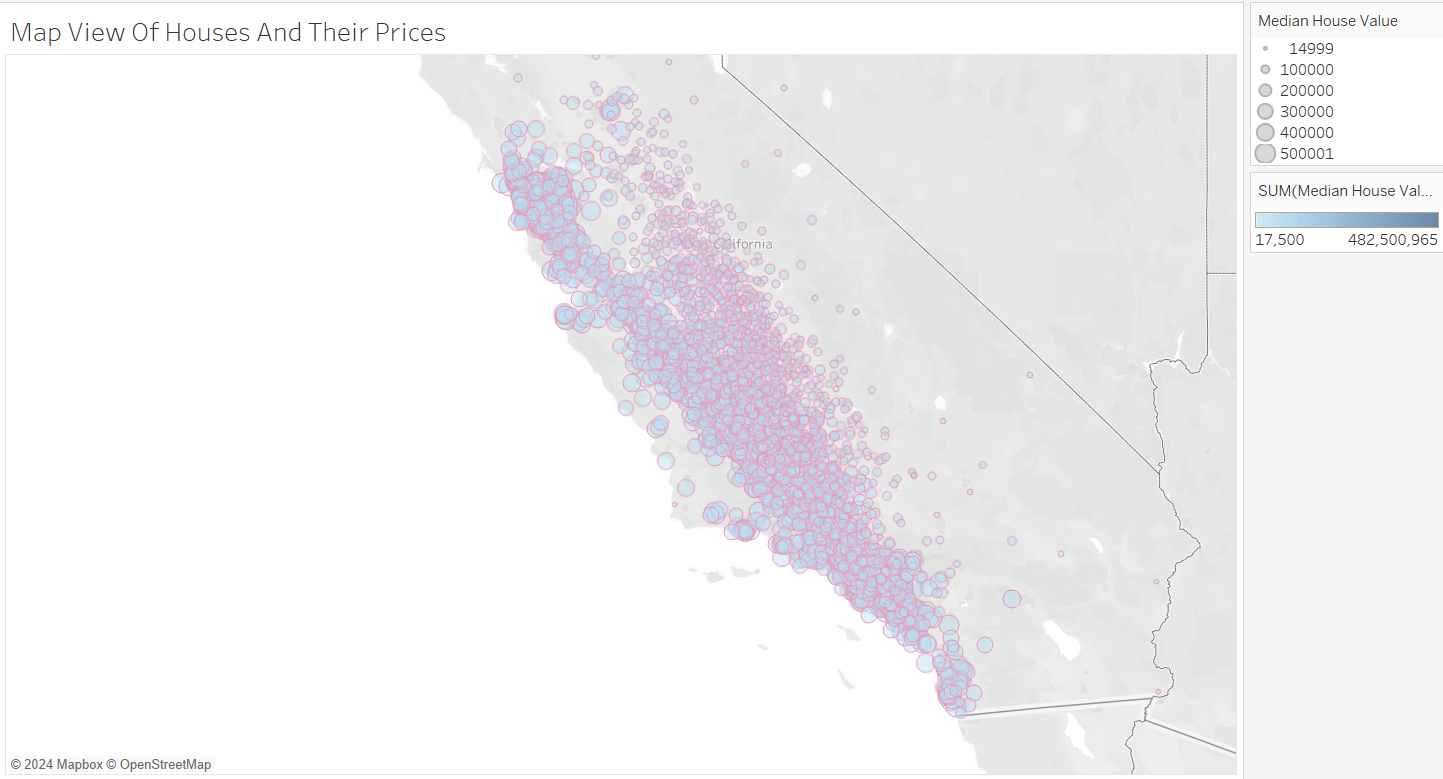